## ***Libraries***

In [ ]:
# Importing Libraries
from math import sqrt
from pandas_datareader import data 
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import datetime as dt
import urllib.request,json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense,LSTM

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


# ***DATA EXTRACTION***

In [ ]:
key = 'dd77e4c78c49c7b78faa3d08a9f429ee' # API Key

# URL url_string to access the data
url_string = 'https://api.eia.gov/series/?api_key=%s&series_id=EBA.HST-ALL.D.H'%key

# Open the URL url_string, which is a string.
url = urllib.request.urlopen(url_string)

# Reading JSON File from url
data = json.loads(url.read().decode())

# Accessing data of hourly consumption of Electricity 
data = data['series']
data = data[0]
data = data['data']

# DataFrame with date and electricity consumption on that date
df = pd.DataFrame(columns=['Date','Consumption'])
df['Consumption'] = df['Consumption'].astype(float)



# data is a list of lists in which each list contain two elements [date and time,consumption of electricity]
for v in data:

  # v[1] i.e. Consumption can't be null
  if(v[1]):

    # Consumption to floating-point numbers which is useful in further analysis
    consumption = float(int(v[1])*1.00)
    
    # Conversion date in string format[YYYYMMDDTHHZ] to datetime format in pandas
    s = v[0]
    # date = pd.to_datetime(s,format = '%Y%m%dT%HZ')
    date = v[0]

    # Adding data_row to dataframe
    data_row = [date,consumption]
    df.loc[-1,:] = data_row
    df.index += 1



In [ ]:
# first five rows of dataframe df
df.head()

,Date,Consumption
41774,20200522T11Z,55.0
41773,20200522T10Z,56.0
41772,20200522T09Z,56.0
41771,20200522T08Z,57.0
41770,20200522T07Z,59.0


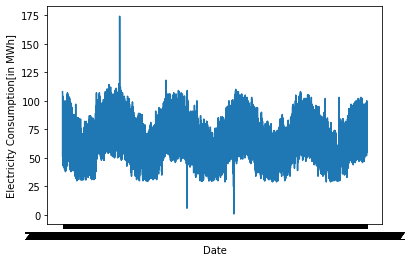

In [ ]:
fig,ax = plt.subplots()                       # Create a figure and a set of subplots.
plt.ylabel('Electricity Consumption[in MWh]') # labelling Y-axis
plt.xlabel('Date')                            # labelling X-axis
ax.plot(df['Date'],df['Consumption'])
plt.show()

In [ ]:
# WorldWeatherOnline historical weather data API wrapper
!pip install wwo-hist

  Created wheel for wwo-hist: filename=wwo_hist-0.0.4-cp36-none-any.whl size=4216 sha256=9d34173e8bbe0766137c9e31db62a7a91ff1176dfa54ff2e3737f6c1c7bfaf7b
  Stored in directory: /root/.cache/pip/wheels/c5/0e/16/329d9233f3b0b7e5fe81b09c5519a193727999c6ae77577ca9
Successfully built wwo-hist


In [ ]:
# Import Package 
from wwo_hist import retrieve_hist_data

In [ ]:
# Retrieving data until today i.e. 12-May-2020
frequency=1
start_date = '11-DEC-2017'
end_date = '18-MAY-2020'
api_key = '609fcb409bf4437e9bc121635200405'
location_list = ['Homestead']

hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = True,
                                export_csv = False,
                                store_df = True)



Retrieving weather data for Homestead


Currently retrieving data for Homestead: from 2017-12-11 to 2017-12-31
Time elapsed (hh:mm:ss.ms) 0:00:01.975032
Currently retrieving data for Homestead: from 2018-01-01 to 2018-01-31
Time elapsed (hh:mm:ss.ms) 0:00:04.475432
Currently retrieving data for Homestead: from 2018-02-01 to 2018-02-28
Time elapsed (hh:mm:ss.ms) 0:00:06.738637
Currently retrieving data for Homestead: from 2018-03-01 to 2018-03-31
Time elapsed (hh:mm:ss.ms) 0:00:09.126287
Currently retrieving data for Homestead: from 2018-04-01 to 2018-04-30
Time elapsed (hh:mm:ss.ms) 0:00:11.501042
Currently retrieving data for Homestead: from 2018-05-01 to 2018-05-31
Time elapsed (hh:mm:ss.ms) 0:00:13.780962
Currently retrieving data for Homestead: from 2018-06-01 to 2018-06-30
Time elapsed (hh:mm:ss.ms) 0:00:16.108638
Currently retrieving data for Homestead: from 2018-07-01 to 2018-07-31
Time elapsed (hh:mm:ss.ms) 0:00:18.787323
Currently retrieving data for Homestead: from 2018-08-

In [ ]:
# Function to convert Timestamp object to String 
def TimestampToString(t):
  return t.strftime("%Y%m%dT%HZ")

In [ ]:
type(hist_weather_data[0])

pandas.core.frame.DataFrame

In [ ]:
# dataframe with hourly weather data from WorldWeatherOnline
hist_weather_data[0]

,date_time,Homestead_maxtempC,Homestead_mintempC,Homestead_totalSnow_cm,Homestead_sunHour,Homestead_uvIndex,Homestead_uvIndex,Homestead_moon_illumination,Homestead_moonrise,Homestead_moonset,Homestead_sunrise,Homestead_sunset,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_cloudcover,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_visibility,Homestead_winddirDegree,Homestead_windspeedKmph
0,2020-05-22 00:00:00,31,25,0.0,11.6,7,1,0,06:34 AM,08:10 PM,06:33 AM,08:04 PM,21,28,28,26,18,15,76,0.0,1018,26,10,65,10
1,2020-05-22 01:00:00,31,25,0.0,11.6,7,1,0,06:34 AM,08:10 PM,06:33 AM,08:04 PM,22,28,28,26,20,21,78,0.0,1017,26,10,69,11
2,2020-05-22 02:00:00,31,25,0.0,11.6,7,1,0,06:34 AM,08:10 PM,06:33 AM,08:04 PM,22,28,28,26,21,27,80,0.1,1017,26,10,72,12
3,2020-05-22 03:00:00,31,25,0.0,11.6,7,1,0,06:34 AM,08:10 PM,06:33 AM,08:04 PM,22,28,28,26,23,33,82,0.1,1017,26,10,76,13
4,2020-05-22 04:00:00,31,25,0.0,11.6,7,1,0,06:34 AM,08:10 PM,06:33 AM,08:04 PM,22,28,28,26,22,49,81,0.0,1017,26,10,85,13
5,2020-05-22 05:00:00,31,25,0.0,11.6,7,1,0,06:34 AM,08:10 PM,06:33 AM,08:04 PM,22,28,28,26,22,64,80,0.2,1017,26,9,94,13
6,2020-05-22 06:00:00,31,25,0.0,11.6,7,1,0,06:34 AM,08:10 PM,06:33 AM,08:04 PM,22,28,28,26,21,80,80,0.2,1017,26,9,103,13
7,2020-05-22 07:00:00,31,25,0.0,11.6,7,6,0,06:34 AM,08:10 PM,06:33 AM,08:04 PM,22,29,29,27,21,73,76,0.1,1017,27,10,102,14
8,2020-05-22 08:00:00,31,25,0.0,11.6,7,7,0,06:34 AM,08:10 PM,06:33 AM,08:04 PM,22,30,30,27,21,65,73,0.1,1017,27,10,102,15
9,2020-05-22 09:00:00,31,25,0.0,11.6,7,7,0,06:34 AM,08:10 PM,06:33 AM,08:04 PM,22,31,31,28,21,58,69,0.1,1017,28,10,102,16


In [ ]:
# dataframe to list
a = hist_weather_data[0].values.tolist()
# Converting Timestamp to string
t = a[0][0]
print(TimestampToString(t))

20171211T00Z


In [ ]:
# features in a dataframes of hist_weather_data
print(hist_weather_data[0].columns)

Index(['date_time', 'Homestead_maxtempC', 'Homestead_mintempC',
       'Homestead_totalSnow_cm', 'Homestead_sunHour', 'Homestead_uvIndex',
       'Homestead_uvIndex', 'Homestead_moon_illumination',
       'Homestead_moonrise', 'Homestead_moonset', 'Homestead_sunrise',
       'Homestead_sunset', 'Homestead_DewPointC', 'Homestead_FeelsLikeC',
       'Homestead_HeatIndexC', 'Homestead_WindChillC',
       'Homestead_WindGustKmph', 'Homestead_cloudcover', 'Homestead_humidity',
       'Homestead_precipMM', 'Homestead_pressure', 'Homestead_tempC',
       'Homestead_visibility', 'Homestead_winddirDegree',
       'Homestead_windspeedKmph'],
      dtype='object')


In [ ]:
# features which we are going use
features = ['date_time', 'Homestead_maxtempC', 'Homestead_mintempC',
       'Homestead_totalSnow_cm','Homestead_DewPointC', 'Homestead_FeelsLikeC',
       'Homestead_HeatIndexC', 'Homestead_WindChillC',
       'Homestead_WindGustKmph', 'Homestead_cloudcover', 'Homestead_humidity',
       'Homestead_precipMM', 'Homestead_pressure', 'Homestead_tempC',
       'Homestead_visibility', 'Homestead_winddirDegree',
       'Homestead_windspeedKmph']

In [ ]:
# CONVERTING THE JSON FILE TO DATAFRAME OF REQUIRED FEATURES 

data = []                                     # List initialised which is used to store list of elements 

for i in hist_weather_data:                   # hist_weather_data is a list of dataframes(i) having hourly weather data

  a = i.values.tolist()                       # conversion of dataframe to list 'a'

  for j in a:                                 # 'a' is list of lists(having weather data), 'j' is a list in 'a'

    w = []                                    # 'w' list initialised to store data needed according to 'features'

    for k in range(len(j)):                   # iterating through the list 'j'
      if(k == 0):
        w.append(TimestampToString(j[k]))
      elif(i.columns[k] in features):         # if element belongs to property of 'features'
        w.append(j[k])                        # then that element is added to list 'w' 

    data.append(w)                            # appending 'w' in data

print(data)

[['20171211T00Z', '19', '9', '0.0', '1', '8', '10', '8', '28', '0', '55', '0.0', '1024', '10', '10', '335', '16'], ['20171211T01Z', '19', '9', '0.0', '2', '8', '10', '8', '28', '0', '55', '0.0', '1024', '10', '10', '337', '16'], ['20171211T02Z', '19', '9', '0.0', '2', '8', '10', '8', '28', '0', '56', '0.0', '1024', '10', '10', '338', '16'], ['20171211T03Z', '19', '9', '0.0', '2', '8', '10', '8', '29', '0', '57', '0.0', '1024', '10', '10', '339', '16'], ['20171211T04Z', '19', '9', '0.0', '1', '7', '10', '7', '29', '0', '54', '0.0', '1024', '10', '10', '342', '17'], ['20171211T05Z', '19', '9', '0.0', '-1', '7', '9', '7', '30', '0', '50', '0.0', '1024', '9', '10', '345', '17'], ['20171211T06Z', '19', '9', '0.0', '-2', '6', '9', '6', '31', '0', '47', '0.0', '1024', '9', '10', '347', '18'], ['20171211T07Z', '19', '9', '0.0', '-1', '8', '11', '8', '28', '0', '45', '0.0', '1024', '11', '10', '350', '18'], ['20171211T08Z', '19', '9', '0.0', '0', '11', '12', '11', '25', '0', '42', '0.0', '1024'

In [ ]:
weatherDataframe = pd.DataFrame(columns=features)   # Dataframe storing weather data according to 'features'

for v in data:
  d = []
  d.append(v[0])
  for i in v[1:]:
    d.append(float(i))

  ln = len(weatherDataframe)
  weatherDataframe.loc[ln] = d                      # Adding elements to weatherDataframe


In [ ]:
weatherDataframe.rename(columns = {'date_time':'Date'},inplace=True)
print(weatherDataframe.columns)

Index(['Date', 'Homestead_maxtempC', 'Homestead_mintempC',
       'Homestead_totalSnow_cm', 'Homestead_DewPointC', 'Homestead_FeelsLikeC',
       'Homestead_HeatIndexC', 'Homestead_WindChillC',
       'Homestead_WindGustKmph', 'Homestead_cloudcover', 'Homestead_humidity',
       'Homestead_precipMM', 'Homestead_pressure', 'Homestead_tempC',
       'Homestead_visibility', 'Homestead_winddirDegree',
       'Homestead_windspeedKmph'],
      dtype='object')


In [ ]:
weatherDataframe.tail()

,Date,Homestead_maxtempC,Homestead_mintempC,Homestead_totalSnow_cm,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_cloudcover,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_visibility,Homestead_winddirDegree,Homestead_windspeedKmph
19,20200522T19Z,31.0,25.0,0.0,22.0,31.0,31.0,28.0,27.0,7.0,69.0,0.0,1017.0,28.0,10.0,86.0,20.0
20,20200522T20Z,31.0,25.0,0.0,22.0,30.0,30.0,27.0,26.0,7.0,72.0,0.0,1017.0,27.0,10.0,87.0,19.0
21,20200522T21Z,31.0,25.0,0.0,22.0,29.0,29.0,27.0,26.0,7.0,76.0,0.0,1017.0,27.0,10.0,88.0,17.0
22,20200522T22Z,31.0,25.0,0.0,22.0,29.0,29.0,26.0,25.0,9.0,78.0,0.0,1017.0,26.0,10.0,90.0,16.0
23,20200522T23Z,31.0,25.0,0.0,22.0,29.0,29.0,26.0,24.0,11.0,79.0,0.0,1017.0,26.0,10.0,93.0,15.0


In [ ]:
joinFeatures = ['Date']

In [ ]:
DataFrame = pd.merge(df,weatherDataframe,on = joinFeatures)

In [ ]:
x,y = DataFrame.shape

In [ ]:
DataFrame.head()

,Date,Consumption,Homestead_maxtempC,Homestead_mintempC,Homestead_totalSnow_cm,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_cloudcover,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_visibility,Homestead_winddirDegree,Homestead_windspeedKmph
0,20200522T10Z,56.0,31.0,25.0,0.0,21.0,32.0,32.0,29.0,21.0,41.0,65.0,0.1,1017.0,29.0,10.0,100.0,17.0
1,20200522T09Z,56.0,31.0,25.0,0.0,22.0,31.0,31.0,28.0,21.0,58.0,69.0,0.1,1017.0,28.0,10.0,102.0,16.0
2,20200522T08Z,57.0,31.0,25.0,0.0,22.0,30.0,30.0,27.0,21.0,65.0,73.0,0.1,1017.0,27.0,10.0,102.0,15.0
3,20200522T07Z,59.0,31.0,25.0,0.0,22.0,29.0,29.0,27.0,21.0,73.0,76.0,0.1,1017.0,27.0,10.0,102.0,14.0
4,20200522T06Z,63.0,31.0,25.0,0.0,22.0,28.0,28.0,26.0,21.0,80.0,80.0,0.2,1017.0,26.0,9.0,103.0,13.0


In [ ]:
features = list(DataFrame.columns)
print(features)

['Date', 'Consumption', 'Homestead_maxtempC', 'Homestead_mintempC', 'Homestead_totalSnow_cm', 'Homestead_DewPointC', 'Homestead_FeelsLikeC', 'Homestead_HeatIndexC', 'Homestead_WindChillC', 'Homestead_WindGustKmph', 'Homestead_cloudcover', 'Homestead_humidity', 'Homestead_precipMM', 'Homestead_pressure', 'Homestead_tempC', 'Homestead_visibility', 'Homestead_winddirDegree', 'Homestead_windspeedKmph']


In [ ]:
DataFrame = DataFrame.values.tolist()

for i in range(x):
  DataFrame[i][0] = pd.to_datetime(DataFrame[i][0],format = '%Y%m%dT%HZ')

DataFrame = pd.DataFrame(DataFrame)

In [ ]:
DataFrame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2020-05-22 10:00:00,56.0,31.0,25.0,0.0,21.0,32.0,32.0,29.0,21.0,41.0,65.0,0.1,1017.0,29.0,10.0,100.0,17.0
1,2020-05-22 09:00:00,56.0,31.0,25.0,0.0,22.0,31.0,31.0,28.0,21.0,58.0,69.0,0.1,1017.0,28.0,10.0,102.0,16.0
2,2020-05-22 08:00:00,57.0,31.0,25.0,0.0,22.0,30.0,30.0,27.0,21.0,65.0,73.0,0.1,1017.0,27.0,10.0,102.0,15.0
3,2020-05-22 07:00:00,59.0,31.0,25.0,0.0,22.0,29.0,29.0,27.0,21.0,73.0,76.0,0.1,1017.0,27.0,10.0,102.0,14.0
4,2020-05-22 06:00:00,63.0,31.0,25.0,0.0,22.0,28.0,28.0,26.0,21.0,80.0,80.0,0.2,1017.0,26.0,9.0,103.0,13.0


In [ ]:
from collections import *

d = defaultdict(lambda : 0)
for i in range(len(features)):
  d[i] = features[i]

DataFrame.rename(columns = d,inplace=True)

In [ ]:
DataFrame.drop(["Homestead_totalSnow_cm"],axis=1,inplace=True)
r = DataFrame.pop("Consumption")
DataFrame['Consumption'] = r
DataFrame.head()

,Date,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_cloudcover,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_visibility,Homestead_winddirDegree,Homestead_windspeedKmph,Consumption
0,2020-05-22 10:00:00,31.0,25.0,21.0,32.0,32.0,29.0,21.0,41.0,65.0,0.1,1017.0,29.0,10.0,100.0,17.0,56.0
1,2020-05-22 09:00:00,31.0,25.0,22.0,31.0,31.0,28.0,21.0,58.0,69.0,0.1,1017.0,28.0,10.0,102.0,16.0,56.0
2,2020-05-22 08:00:00,31.0,25.0,22.0,30.0,30.0,27.0,21.0,65.0,73.0,0.1,1017.0,27.0,10.0,102.0,15.0,57.0
3,2020-05-22 07:00:00,31.0,25.0,22.0,29.0,29.0,27.0,21.0,73.0,76.0,0.1,1017.0,27.0,10.0,102.0,14.0,59.0
4,2020-05-22 06:00:00,31.0,25.0,22.0,28.0,28.0,26.0,21.0,80.0,80.0,0.2,1017.0,26.0,9.0,103.0,13.0,63.0


# ***FEATURE SELECTION***
Statistical tests can be used to select those features that have the strongest relationship with the output variable.

## **Correlation Matrix with Heatmap**

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

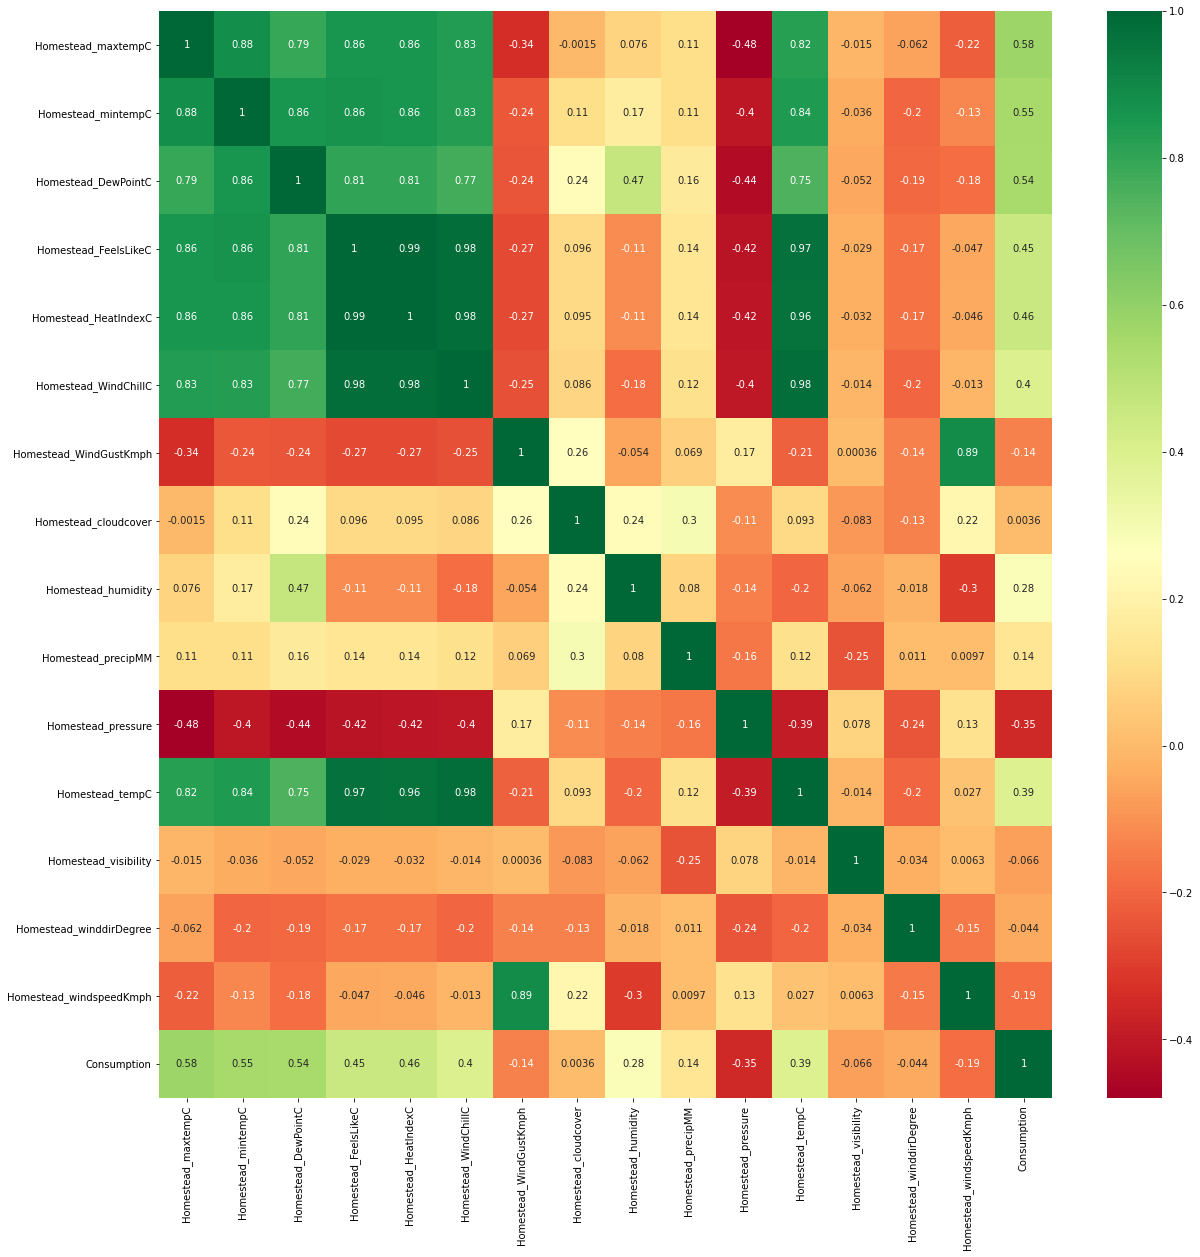

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = DataFrame.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(DataFrame[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## ***Pearson Correlation Coefficient***

Pearson's Correlation Coefficient helps to find out the relationship between two quantities. It gives the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

In [ ]:
pearsoncorr = DataFrame.corr(method='pearson')
pearsoncorr

,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_cloudcover,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_visibility,Homestead_winddirDegree,Homestead_windspeedKmph,Consumption
Homestead_maxtempC,1.000000,0.883273,0.794992,0.857267,0.857561,0.833336,-0.338743,-0.001452,0.075693,0.114976,-0.480098,0.820983,-0.015487,-0.061980,-0.217996,0.577841
Homestead_mintempC,0.883273,1.000000,0.856503,0.862417,0.858269,0.827579,-0.235670,0.111913,0.172242,0.113380,-0.404993,0.843137,-0.035897,-0.199883,-0.126103,0.553478
Homestead_DewPointC,0.794992,0.856503,1.000000,0.808247,0.807241,0.771709,-0.242878,0.242034,0.466462,0.160314,-0.443265,0.745863,-0.052186,-0.192686,-0.182900,0.544152
Homestead_FeelsLikeC,0.857267,0.862417,0.808247,1.000000,0.994568,0.981961,-0.268208,0.095767,-0.114265,0.138546,-0.418591,0.968033,-0.029470,-0.172721,-0.046863,0.452178
Homestead_HeatIndexC,0.857561,0.858269,0.807241,0.994568,1.000000,0.977934,-0.269109,0.094952,-0.114841,0.139474,-0.415210,0.962164,-0.032433,-0.168344,-0.046278,0.456179
Homestead_WindChillC,0.833336,0.827579,0.771709,0.981961,0.977934,1.000000,-0.249737,0.086423,-0.182324,0.117787,-0.401569,0.978339,-0.013627,-0.198564,-0.013097,0.398311
Homestead_WindGustKmph,-0.338743,-0.235670,-0.242878,-0.268208,-0.269109,-0.249737,1.000000,0.256752,-0.053944,0.069052,0.167979,-0.214068,0.000364,-0.138623,0.887189,-0.135908
Homestead_cloudcover,-0.001452,0.111913,0.242034,0.095767,0.094952,0.086423,0.256752,1.000000,0.243101,0.297610,-0.113840,0.092790,-0.083158,-0.133451,0.217123,0.003571
Homestead_humidity,0.075693,0.172242,0.466462,-0.114265,-0.114841,-0.182324,-0.053944,0.243101,1.000000,0.079939,-0.141012,-0.201838,-0.061892,-0.018131,-0.302649,0.280944
Homestead_precipMM,0.114976,0.113380,0.160314,0.138546,0.139474,0.117787,0.069052,0.297610,0.079939,1.000000,-0.158634,0.118801,-0.248137,0.011245,0.009692,0.138636


In [ ]:
pearsoncorr_list = pearsoncorr.values.tolist()                     # Dataframe 'pearsoncorr' with pearson correlation values among features converted to list

features = DataFrame.columns
features = features[1:-1]                                    # features of DataFrame except Date

a = list(pearsoncorr_list[-1])                              # Pearson correlation value of features vs consumption
pf = pd.DataFrame(columns=['Features','ratio'])            # Dataframe to visualise list 'a' values relation to features

print('CONSUMPTION CORRELATIONS (PEARSON) FOR HOMESTEAD')

for i in range(len(a)-1):
  d = [features[i],a[i]]
  ln = len(pf)
  pf.loc[ln] = d

pf

CONSUMPTION CORRELATIONS (PEARSON) FOR HOMESTEAD


,Features,ratio
0,Homestead_maxtempC,0.577841
1,Homestead_mintempC,0.553478
2,Homestead_DewPointC,0.544152
3,Homestead_FeelsLikeC,0.452178
4,Homestead_HeatIndexC,0.456179
5,Homestead_WindChillC,0.398311
6,Homestead_WindGustKmph,-0.135908
7,Homestead_cloudcover,0.003571
8,Homestead_humidity,0.280944
9,Homestead_precipMM,0.138636


## ***Kendall rank correlation coefficient***

It is a measure of rank correlation: the similarity of the orderings of the data when ranked by each of the quantities.

The Kendall correlation between two variables will be high when observations have a similar (or identical for a correlation of 1) rank (i.e. relative position label of the observations within the variable: 1st, 2nd, 3rd, etc.) between the two variables, and low when observations have a dissimilar (or fully different for a correlation of −1) rank between the two variables.

In [ ]:
corr = DataFrame.corr(method='kendall')
corr

,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_cloudcover,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_visibility,Homestead_winddirDegree,Homestead_windspeedKmph,Consumption
Homestead_maxtempC,1.000000,0.751105,0.651346,0.708901,0.710677,0.666073,-0.249774,0.012599,-0.002150,0.169663,-0.363422,0.662237,-0.136811,0.084406,-0.158470,0.431345
Homestead_mintempC,0.751105,1.000000,0.742600,0.736759,0.736925,0.672272,-0.192284,0.085252,0.045264,0.173675,-0.294250,0.674006,-0.149589,-0.018601,-0.112367,0.421851
Homestead_DewPointC,0.651346,0.742600,1.000000,0.647369,0.649043,0.563114,-0.214497,0.146269,0.246169,0.218764,-0.334871,0.552116,-0.180126,0.032274,-0.172216,0.433854
Homestead_FeelsLikeC,0.708901,0.736759,0.647369,1.000000,0.991251,0.926985,-0.192564,0.069064,-0.153418,0.179692,-0.303844,0.916246,-0.136877,0.022845,-0.036438,0.316264
Homestead_HeatIndexC,0.710677,0.736925,0.649043,0.991251,1.000000,0.920974,-0.193706,0.069169,-0.151775,0.179616,-0.304355,0.910518,-0.137828,0.023688,-0.037504,0.319454
Homestead_WindChillC,0.666073,0.672272,0.563114,0.926985,0.920974,1.000000,-0.173991,0.049855,-0.242750,0.162573,-0.286507,0.976896,-0.116260,0.016067,-0.000665,0.270263
Homestead_WindGustKmph,-0.249774,-0.192284,-0.214497,-0.192564,-0.193706,-0.173991,1.000000,0.141697,-0.048795,0.033156,0.118758,-0.152044,0.010955,-0.140094,0.750892,-0.086757
Homestead_cloudcover,0.012599,0.085252,0.146269,0.069064,0.069169,0.049855,0.141697,1.000000,0.157785,0.347088,-0.100682,0.062429,-0.202262,-0.085750,0.126079,0.018218
Homestead_humidity,-0.002150,0.045264,0.246169,-0.153418,-0.151775,-0.242750,-0.048795,0.157785,1.000000,0.070180,-0.093171,-0.248444,-0.076373,0.008725,-0.231586,0.189348
Homestead_precipMM,0.169663,0.173675,0.218764,0.179692,0.179616,0.162573,0.033156,0.347088,0.070180,1.000000,-0.188820,0.167303,-0.506659,0.022028,0.012014,0.150670


In [ ]:
DataFrame

,Date,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_cloudcover,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_visibility,Homestead_winddirDegree,Homestead_windspeedKmph,Consumption
0,2020-05-18 23:00:00,32.0,25.0,22.0,28.0,28.0,26.0,21.0,51.0,82.0,0.3,1014.0,26.0,9.0,163.0,12.0,94.0
1,2020-05-18 22:00:00,32.0,25.0,22.0,29.0,29.0,26.0,20.0,43.0,78.0,0.1,1014.0,26.0,10.0,175.0,12.0,94.0
2,2020-05-18 21:00:00,32.0,25.0,22.0,29.0,29.0,27.0,19.0,35.0,74.0,0.2,1014.0,27.0,10.0,186.0,12.0,95.0
3,2020-05-18 20:00:00,32.0,25.0,21.0,30.0,30.0,28.0,20.0,30.0,68.0,0.2,1014.0,28.0,10.0,192.0,14.0,94.0
4,2020-05-18 19:00:00,32.0,25.0,21.0,31.0,31.0,29.0,21.0,24.0,63.0,0.0,1013.0,29.0,10.0,198.0,16.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21277,2017-12-11 04:00:00,19.0,9.0,1.0,7.0,10.0,7.0,29.0,0.0,54.0,0.0,1024.0,10.0,10.0,342.0,17.0,46.0
21278,2017-12-11 03:00:00,19.0,9.0,2.0,8.0,10.0,8.0,29.0,0.0,57.0,0.0,1024.0,10.0,10.0,339.0,16.0,52.0
21279,2017-12-11 02:00:00,19.0,9.0,2.0,8.0,10.0,8.0,28.0,0.0,56.0,0.0,1024.0,10.0,10.0,338.0,16.0,55.0
21280,2017-12-11 01:00:00,19.0,9.0,2.0,8.0,10.0,8.0,28.0,0.0,55.0,0.0,1024.0,10.0,10.0,337.0,16.0,56.0


## ***R Squared Correlation***

Correlation (otherwise known as “R”) is a number between 1 and -1 where a value of +1 implies that an increase in x results in some increase in y, -1 implies that an increase in x results in a decrease in y, and 0 means that there isn’t any relationship between x and y. Like correlation, R² tells you how related two things are. However, we tend to use R² because it’s easier to interpret. R² is the percentage of variation (i.e. varies from 0 to 1) explained by the relationship between two variables.

### ***R² = (var(mean) - var(line)) / var(mean)***

In [ ]:
RConsumption = {}
h = ['Date','Consumption']
for col in DataFrame.columns:
  if( col not in h):
    slope, intercept, r_value, p_value, std_err = scipy.stats.stats.linregress(DataFrame['Consumption'], DataFrame[col])
    RConsumption[col] = r_value**2
print('DEMAND CORRELATIONS (r^2) FOR HOMESTEAD')

cons_df = pd.DataFrame(RConsumption.items(), columns=['Features', 'r**2'])
cons_df

DEMAND CORRELATIONS (r^2) FOR HOMESTEAD


,Features,r**2
0,Homestead_maxtempC,0.333900
1,Homestead_mintempC,0.306338
2,Homestead_DewPointC,0.296101
3,Homestead_FeelsLikeC,0.204465
4,Homestead_HeatIndexC,0.208099
5,Homestead_WindChillC,0.158652
6,Homestead_WindGustKmph,0.018471
7,Homestead_cloudcover,0.000013
8,Homestead_humidity,0.078929
9,Homestead_precipMM,0.019220


## ***Features Drop-out***

In [ ]:
DataFrame.columns

Index(['Date', 'Homestead_maxtempC', 'Homestead_mintempC',
       'Homestead_DewPointC', 'Homestead_FeelsLikeC', 'Homestead_HeatIndexC',
       'Homestead_WindChillC', 'Homestead_WindGustKmph',
       'Homestead_cloudcover', 'Homestead_humidity', 'Homestead_precipMM',
       'Homestead_pressure', 'Homestead_tempC', 'Homestead_visibility',
       'Homestead_winddirDegree', 'Homestead_windspeedKmph', 'Consumption'],
      dtype='object')

In [ ]:
DataFrame

,Date,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_cloudcover,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_visibility,Homestead_winddirDegree,Homestead_windspeedKmph,Consumption
0,2020-05-22 10:00:00,31.0,25.0,21.0,32.0,32.0,29.0,21.0,41.0,65.0,0.1,1017.0,29.0,10.0,100.0,17.0,56.0
1,2020-05-22 09:00:00,31.0,25.0,22.0,31.0,31.0,28.0,21.0,58.0,69.0,0.1,1017.0,28.0,10.0,102.0,16.0,56.0
2,2020-05-22 08:00:00,31.0,25.0,22.0,30.0,30.0,27.0,21.0,65.0,73.0,0.1,1017.0,27.0,10.0,102.0,15.0,57.0
3,2020-05-22 07:00:00,31.0,25.0,22.0,29.0,29.0,27.0,21.0,73.0,76.0,0.1,1017.0,27.0,10.0,102.0,14.0,59.0
4,2020-05-22 06:00:00,31.0,25.0,22.0,28.0,28.0,26.0,21.0,80.0,80.0,0.2,1017.0,26.0,9.0,103.0,13.0,63.0
5,2020-05-22 05:00:00,31.0,25.0,22.0,28.0,28.0,26.0,22.0,64.0,80.0,0.2,1017.0,26.0,9.0,94.0,13.0,70.0


In [ ]:
dataframe2 = DataFrame.copy()
dataframe2

,Unnamed: 0,Date,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_cloudcover,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_visibility,Homestead_winddirDegree,Homestead_windspeedKmph,Consumption
0,0,2020-05-18 11:00:00,32.0,25.0,21.0,29.0,32.0,29.0,17.0,80.0,62.0,0.3,1015.0,0.0,9.0,181.0,13.0,55.0
1,1,2020-05-18 10:00:00,32.0,25.0,22.0,28.0,31.0,28.0,13.0,83.0,66.0,0.1,1015.0,0.0,9.0,177.0,10.0,56.0
2,2,2020-05-18 09:00:00,32.0,25.0,22.0,28.0,30.0,28.0,9.0,85.0,71.0,0.2,1015.0,0.0,10.0,173.0,6.0,56.0
3,3,2020-05-18 08:00:00,32.0,25.0,22.0,27.0,30.0,27.0,7.0,69.0,74.0,0.1,1014.0,0.0,10.0,189.0,5.0,57.0
4,4,2020-05-18 07:00:00,32.0,25.0,22.0,27.0,29.0,27.0,5.0,53.0,78.0,0.0,1014.0,0.0,10.0,204.0,3.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21265,21265,2017-12-11 04:00:00,19.0,9.0,1.0,7.0,10.0,7.0,29.0,0.0,54.0,0.0,1024.0,10.0,10.0,342.0,17.0,46.0
21266,21266,2017-12-11 03:00:00,19.0,9.0,2.0,8.0,10.0,8.0,29.0,0.0,57.0,0.0,1024.0,10.0,10.0,339.0,16.0,52.0
21267,21267,2017-12-11 02:00:00,19.0,9.0,2.0,8.0,10.0,8.0,28.0,0.0,56.0,0.0,1024.0,10.0,10.0,338.0,16.0,55.0
21268,21268,2017-12-11 01:00:00,19.0,9.0,2.0,8.0,10.0,8.0,28.0,0.0,55.0,0.0,1024.0,10.0,10.0,337.0,16.0,56.0


In [ ]:
dataframe2=pd.read_csv('https://github.com/ajtheb/Haemstead-Electric-Consumption/blob/master/electrical_consumption.csv?raw=true')

In [ ]:
dataframe2.shape

(21270, 18)

In [ ]:
f = ['Unnamed: 0','Homestead_cloudcover','Homestead_visibility','Homestead_winddirDegree']

In [ ]:
dataframe2.drop(f,axis = 1,inplace = True)

In [ ]:
dataframe2

,Date,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_windspeedKmph,Consumption
0,2020-05-18 11:00:00,32.0,25.0,21.0,29.0,32.0,29.0,17.0,62.0,0.3,1015.0,0.0,13.0,55.0
1,2020-05-18 10:00:00,32.0,25.0,22.0,28.0,31.0,28.0,13.0,66.0,0.1,1015.0,0.0,10.0,56.0
2,2020-05-18 09:00:00,32.0,25.0,22.0,28.0,30.0,28.0,9.0,71.0,0.2,1015.0,0.0,6.0,56.0
3,2020-05-18 08:00:00,32.0,25.0,22.0,27.0,30.0,27.0,7.0,74.0,0.1,1014.0,0.0,5.0,57.0
4,2020-05-18 07:00:00,32.0,25.0,22.0,27.0,29.0,27.0,5.0,78.0,0.0,1014.0,0.0,3.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21265,2017-12-11 04:00:00,19.0,9.0,1.0,7.0,10.0,7.0,29.0,54.0,0.0,1024.0,10.0,17.0,46.0
21266,2017-12-11 03:00:00,19.0,9.0,2.0,8.0,10.0,8.0,29.0,57.0,0.0,1024.0,10.0,16.0,52.0
21267,2017-12-11 02:00:00,19.0,9.0,2.0,8.0,10.0,8.0,28.0,56.0,0.0,1024.0,10.0,16.0,55.0
21268,2017-12-11 01:00:00,19.0,9.0,2.0,8.0,10.0,8.0,28.0,55.0,0.0,1024.0,10.0,16.0,56.0


In [ ]:
print(dataframe2.columns)

Index(['Date', 'Homestead_maxtempC', 'Homestead_mintempC',
       'Homestead_DewPointC', 'Homestead_FeelsLikeC', 'Homestead_HeatIndexC',
       'Homestead_WindChillC', 'Homestead_WindGustKmph', 'Homestead_humidity',
       'Homestead_precipMM', 'Homestead_pressure', 'Homestead_tempC',
       'Homestead_windspeedKmph', 'Consumption'],
      dtype='object')


In [ ]:
dataframe2

,Date,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_windspeedKmph,Consumption
0,2020-05-22 10:00:00,31.0,25.0,21.0,32.0,32.0,29.0,21.0,65.0,0.1,1017.0,29.0,17.0,56.0
1,2020-05-22 09:00:00,31.0,25.0,22.0,31.0,31.0,28.0,21.0,69.0,0.1,1017.0,28.0,16.0,56.0
2,2020-05-22 08:00:00,31.0,25.0,22.0,30.0,30.0,27.0,21.0,73.0,0.1,1017.0,27.0,15.0,57.0
3,2020-05-22 07:00:00,31.0,25.0,22.0,29.0,29.0,27.0,21.0,76.0,0.1,1017.0,27.0,14.0,59.0
4,2020-05-22 06:00:00,31.0,25.0,22.0,28.0,28.0,26.0,21.0,80.0,0.2,1017.0,26.0,13.0,63.0
5,2020-05-22 05:00:00,31.0,25.0,22.0,28.0,28.0,26.0,22.0,80.0,0.2,1017.0,26.0,13.0,70.0


# ***DATA NORMALISATION***

In [ ]:
Date = dataframe2.pop('Date')           # Removing column 'Date' from dataframe2

In [ ]:
values = dataframe2.values

## **MinMaxScaler**

Standardizes features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one.

The standardization is given by:
```
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
```



where min, max = feature_range.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)           # Fit to data, then transform it.

In [ ]:
scaled.shape

(21270, 13)

In [ ]:
scaled[:,12]

array([0.29166667, 0.29761905, 0.29761905, ..., 0.29166667, 0.29761905,
       0.29761905])

In [ ]:
dataframe2['Date'] = Date

In [ ]:
dataframe2.shape

(21270, 14)

In [ ]:
dataframe2.head()

,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_windspeedKmph,Consumption,Date
0,32.0,25.0,21.0,29.0,32.0,29.0,17.0,62.0,0.3,1015.0,0.0,13.0,55.0,2020-05-18 11:00:00
1,32.0,25.0,22.0,28.0,31.0,28.0,13.0,66.0,0.1,1015.0,0.0,10.0,56.0,2020-05-18 10:00:00
2,32.0,25.0,22.0,28.0,30.0,28.0,9.0,71.0,0.2,1015.0,0.0,6.0,56.0,2020-05-18 09:00:00
3,32.0,25.0,22.0,27.0,30.0,27.0,7.0,74.0,0.1,1014.0,0.0,5.0,57.0,2020-05-18 08:00:00
4,32.0,25.0,22.0,27.0,29.0,27.0,5.0,78.0,0.0,1014.0,0.0,3.0,59.0,2020-05-18 07:00:00


In [ ]:
DataFrame1 = dataframe2.copy(deep = False)
DataFrame1.head()

,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_windspeedKmph,Consumption,Date
0,32.0,25.0,21.0,29.0,32.0,29.0,17.0,62.0,0.3,1015.0,0.0,13.0,55.0,2020-05-18 11:00:00
1,32.0,25.0,22.0,28.0,31.0,28.0,13.0,66.0,0.1,1015.0,0.0,10.0,56.0,2020-05-18 10:00:00
2,32.0,25.0,22.0,28.0,30.0,28.0,9.0,71.0,0.2,1015.0,0.0,6.0,56.0,2020-05-18 09:00:00
3,32.0,25.0,22.0,27.0,30.0,27.0,7.0,74.0,0.1,1014.0,0.0,5.0,57.0,2020-05-18 08:00:00
4,32.0,25.0,22.0,27.0,29.0,27.0,5.0,78.0,0.0,1014.0,0.0,3.0,59.0,2020-05-18 07:00:00


# ***Training and Testing***

In [ ]:
 # convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[range(13,26)],axis=1,inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1)
1,0.85,0.892857,0.84375,0.743590,0.794118,0.828571,0.269841,0.563218,0.041667,0.44,0.0,0.302326,0.291667
2,0.85,0.892857,0.87500,0.717949,0.764706,0.800000,0.206349,0.609195,0.013889,0.44,0.0,0.232558,0.297619
3,0.85,0.892857,0.87500,0.717949,0.735294,0.800000,0.142857,0.666667,0.027778,0.44,0.0,0.139535,0.297619
4,0.85,0.892857,0.87500,0.692308,0.735294,0.771429,0.111111,0.701149,0.013889,0.40,0.0,0.116279,0.303571
5,0.85,0.892857,0.87500,0.692308,0.705882,0.771429,0.079365,0.747126,0.000000,0.40,0.0,0.069767,0.315476


In [ ]:
# split into train and test sets
values = reframed.values
n_train_hours = int(len(values)*0.68)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(14462, 1, 12) (14462,) (6807, 1, 12) (6807,)


In [ ]:
print(values)

[[0.85       0.89285714 0.84375    ... 0.         0.30232558 0.29166667]
 [0.85       0.89285714 0.875      ... 0.         0.23255814 0.29761905]
 [0.85       0.89285714 0.875      ... 0.         0.13953488 0.29761905]
 ...
 [0.2        0.32142857 0.25       ... 0.28571429 0.37209302 0.27380952]
 [0.2        0.32142857 0.25       ... 0.28571429 0.37209302 0.29166667]
 [0.2        0.32142857 0.25       ... 0.28571429 0.37209302 0.29761905]]


Train on 14462 samples, validate on 6807 samples
Epoch 1/250
 - 1s - loss: 0.0803 - val_loss: 0.0860
Epoch 2/250
 - 0s - loss: 0.0728 - val_loss: 0.0853
Epoch 3/250
 - 0s - loss: 0.0723 - val_loss: 0.0841
Epoch 4/250
 - 0s - loss: 0.0720 - val_loss: 0.0822
Epoch 5/250
 - 0s - loss: 0.0716 - val_loss: 0.0810
Epoch 6/250
 - 0s - loss: 0.0714 - val_loss: 0.0798
Epoch 7/250
 - 0s - loss: 0.0712 - val_loss: 0.0793
Epoch 8/250
 - 0s - loss: 0.0711 - val_loss: 0.0783
Epoch 9/250
 - 0s - loss: 0.0709 - val_loss: 0.0772
Epoch 10/250
 - 0s - loss: 0.0708 - val_loss: 0.0769
Epoch 11/250
 - 0s - loss: 0.0707 - val_loss: 0.0763
Epoch 12/250
 - 0s - loss: 0.0706 - val_loss: 0.0751
Epoch 13/250
 - 0s - loss: 0.0705 - val_loss: 0.0745
Epoch 14/250
 - 0s - loss: 0.0704 - val_loss: 0.0744
Epoch 15/250
 - 0s - loss: 0.0703 - val_loss: 0.0735
Epoch 16/250
 - 0s - loss: 0.0702 - val_loss: 0.0732
Epoch 17/250
 - 0s - loss: 0.0701 - val_loss: 0.0733
Epoch 18/250
 - 1s - loss: 0.0701 - val_loss: 0.0728
Epoch 

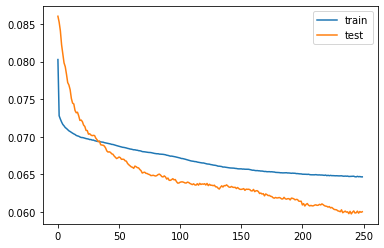

In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=250, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
print(test_X.shape)

(6807, 1, 12)


In [ ]:
# make a prediction
yhat = model.predict(test_X)
print(yhat.shape)

(6807, 1)


In [ ]:
#reshaping as the shape when scaling was done
test_x = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((test_x,yhat), axis=1)
print(inv_yhat.shape)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
#reshaping as the shape when scaling was done
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_x,test_y), axis=1)
# invert scaling for actual
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

(6807, 13)
Test RMSE: 12.252


In [ ]:
 from sklearn.metrics import r2_score
 r2_score(inv_y, inv_yhat)

0.5250358717226671

In [ ]:
com=pd.DataFrame(list(zip(inv_y,inv_yhat)),columns=['Actual','Predicted'])
com.tail()

,Actual,Predicted
6802,41.0,39.742944
6803,46.0,41.606459
6804,52.0,42.551223
6805,55.0,42.441181
6806,56.0,42.531093


In [ ]:
import pickle 
  
# Save the trained model. 
Pkl_Filename = "Pickle_EC_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [ ]:
from google.colab import files
files.download(Pkl_Filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Prediction**

In [ ]:
test_data= pd.read_csv('https://github.com/ajtheb/Haemstead-Electric-Consumption/raw/master/22may.csv')
print(test_data.shape)

(6, 15)


In [ ]:
f = ['Unnamed: 0']
test_data.drop(f,axis = 1,inplace = True)
test_data.head()

,Date,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_windspeedKmph,Consumption
0,2020-05-22 10:00:00,31.0,25.0,21.0,32.0,32.0,29.0,21.0,65.0,0.1,1017.0,29.0,17.0,56.0
1,2020-05-22 09:00:00,31.0,25.0,22.0,31.0,31.0,28.0,21.0,69.0,0.1,1017.0,28.0,16.0,56.0
2,2020-05-22 08:00:00,31.0,25.0,22.0,30.0,30.0,27.0,21.0,73.0,0.1,1017.0,27.0,15.0,57.0
3,2020-05-22 07:00:00,31.0,25.0,22.0,29.0,29.0,27.0,21.0,76.0,0.1,1017.0,27.0,14.0,59.0
4,2020-05-22 06:00:00,31.0,25.0,22.0,28.0,28.0,26.0,21.0,80.0,0.2,1017.0,26.0,13.0,63.0


In [ ]:
actual=test_data['Consumption']
actual=actual.values

In [ ]:
actual.shape

(6,)

In [ ]:
Date = test_data.pop('Date')           # Removing column 'Date' from dataframe2
values = test_data.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)           # Fit to data, then transform it.
test_data['Date'] = Date

In [ ]:
scaled.shape

(6, 13)

In [ ]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[range(13,26)],axis=1,inplace=True)
reframed.head()
values = reframed.values
test_x,test_y=values[:,:-1],values[:,-1]
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))


In [ ]:
yhat_test = model.predict(test_x)

In [ ]:
yhat_test.shape

(5, 1)

In [ ]:
test_x = test_x.reshape((test_x.shape[0], test_x.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((test_x,yhat_test), axis=1)
print(inv_yhat.shape)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_x,test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

(5, 13)


In [ ]:
print(inv_y.shape,inv_yhat.shape)

(5,) (5,)


In [ ]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3.062


In [ ]:
com=pd.DataFrame(list(zip(inv_y,inv_yhat)),columns=['Actual','Predicted'])
com.tail()

,Actual,Predicted
0,56.0,50.324623
1,56.0,53.477255
2,57.0,58.196810
3,59.0,59.636456
4,63.0,60.456098
